In [1]:
#diffusers is a hugging face page for using diffusion models from hugging face hub
!pip install diffusers transformers accelerate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 62.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 51.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 32.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 15.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 81.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [2]:
from diffusers import StableDiffusionPipeline
import torch
import matplotlib.pyplot as plt

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

In [2]:
!pip show torch

Name: torch
Version: 2.6.0+cu124
Summary: Tensors and Dynamic neural networks in Python with strong GPU acceleration
Home-page: https://pytorch.org/
Author: PyTorch Team
Author-email: packages@pytorch.org
License: BSD-3-Clause
Location: /usr/local/lib/python3.11/dist-packages
Requires: filelock, fsspec, jinja2, networkx, nvidia-cublas-cu12, nvidia-cuda-cupti-cu12, nvidia-cuda-nvrtc-cu12, nvidia-cuda-runtime-cu12, nvidia-cudnn-cu12, nvidia-cufft-cu12, nvidia-curand-cu12, nvidia-cusolver-cu12, nvidia-cusparse-cu12, nvidia-cusparselt-cu12, nvidia-nccl-cu12, nvidia-nvjitlink-cu12, nvidia-nvtx-cu12, sympy, triton, typing-extensions
Required-by: accelerate, fastai, peft, sentence-transformers, timm, torchaudio, torchvision


In [4]:
model_id1="dreamlike-art/dreamlike-diffusion-1.0"
model_id2="stabilityai/stable-diffusion-xl-base-1.0"

pipe=StableDiffusionPipeline.from_pretrained(model_id1,torch_dtype=torch.float16,use_safetensors=True)
pipe=pipe.to("cuda")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/511 [00:00<?, ?B/s]

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/518 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/807 [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/341 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/1.72G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/577 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/901 [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

In [5]:
prompt="""An elephant is joyfully riding a brightly colored rocket through the sky. The rocket's flames trail behind as they soar above fluffy clouds.
 The elephant wears a determined expression, ears flapping in the wind, against a backdrop of a clear blue sky"""

In [6]:
image=pipe(prompt).images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

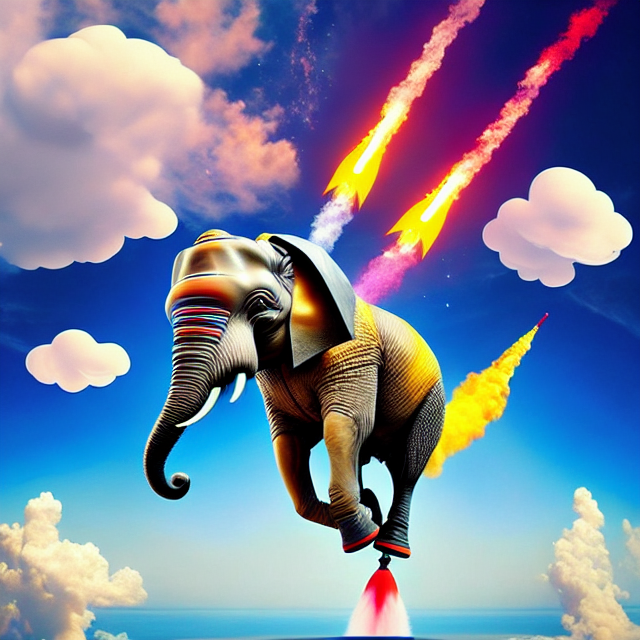

In [6]:
image

[Prompt :] An elephant is joyfully riding a brightly colored rocket through the sky. The rocket's flames trail behind as they soar above fluffy clouds.
 The elephant wears a determined expression, ears flapping in the wind, against a backdrop of a clear blue sky


(-0.5, 639.5, 639.5, -0.5)

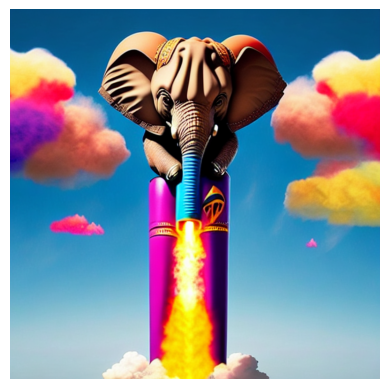

In [7]:
print("[Prompt :]",prompt)
plt.imshow(image)
plt.axis('off')

In [8]:
prompt2="""A clever monkey is sitting at a desk, focused on coding on a sleek laptop.
 The screen glows with lines of colorful code as the monkey types with determination.
 The background is a cozy, techy workspace with books, a coffee mug, and futuristic lighting.
  The monkey wears a pair of glasses, adding to its intelligent and curious expression"""

image=pipe(prompt2).images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

[Prompt :] A clever monkey is sitting at a desk, focused on coding on a sleek laptop.
 The screen glows with lines of colorful code as the monkey types with determination.
 The background is a cozy, techy workspace with books, a coffee mug, and futuristic lighting.
  The monkey wears a pair of glasses, adding to its intelligent and curious expression


(-0.5, 639.5, 639.5, -0.5)

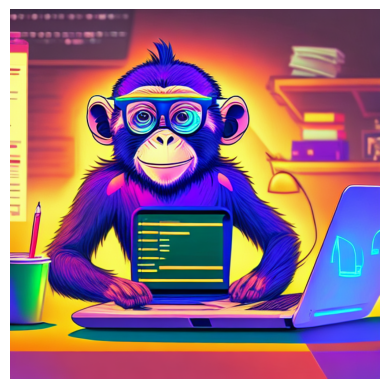

In [9]:
print("[Prompt :]",prompt2)
plt.imshow(image)
plt.axis('off')

In [9]:
def generate_image(pipe,prompt,params):
  image=pipe(prompt,**params).images

  num_images=len(image)
  if num_images>1:
    fig,ax=plt.subplots(nrows=1,ncols=num_images)
    for i in range(num_images):
      ax[i].imshow(image[i])
      ax[i].axis('off')
  else:
    fig=plt.figure()
    plt.imshow(image[0])
    plt.axis('off')
  plt.tight_layout()



In [11]:
prompt3="""A futuristic alien with glowing blue skin and large luminous eyes is
floating in a luxurious swimming pool under a starry night sky. The water shimmers
 with bioluminescent colors, and the alien playfully splashes, enjoying the peaceful
  atmosphere. In the background, a futuristic city
skyline glows with neon lights, adding a sci-fi vibe to the scene."""

params={}

  0%|          | 0/50 [00:00<?, ?it/s]

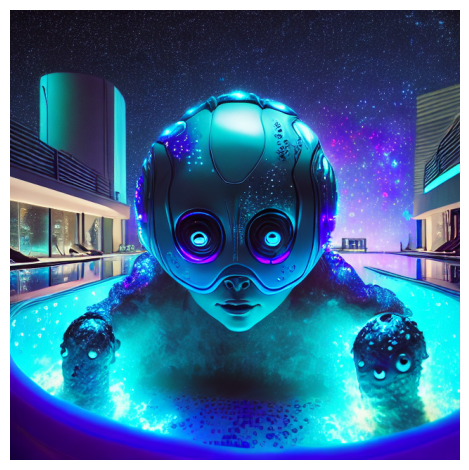

In [12]:
generate_image(pipe,prompt3,params)

  0%|          | 0/100 [00:00<?, ?it/s]

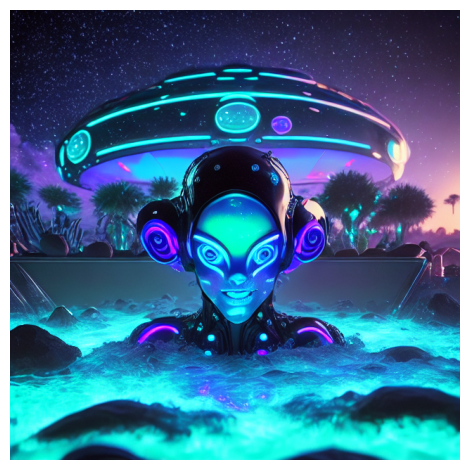

In [13]:
#number if inferencing _steps
params={'num_inference_steps':100}

generate_image(pipe,prompt3,params)

  0%|          | 0/100 [00:00<?, ?it/s]

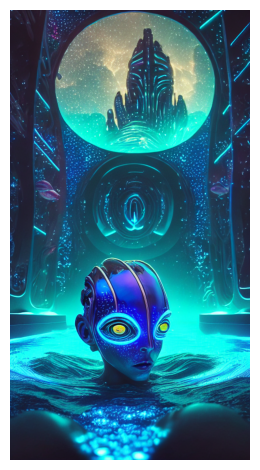

In [12]:
#height & width
params={'num_inference_steps':100,'height':int(1.5*640),'width':512}

generate_image(pipe,prompt3,params)

  0%|          | 0/100 [00:00<?, ?it/s]

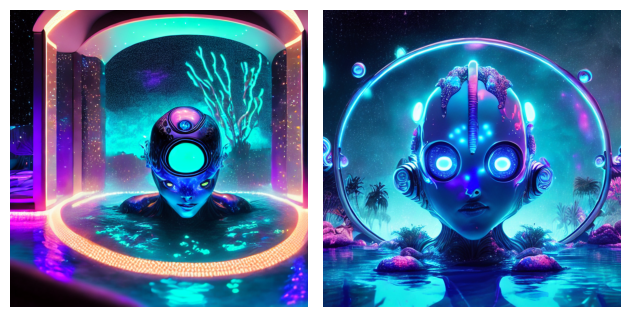

In [13]:
params={'num_inference_steps':100,'num_images_per_prompt':2}
generate_image(pipe,prompt3,params)

  0%|          | 0/100 [00:00<?, ?it/s]

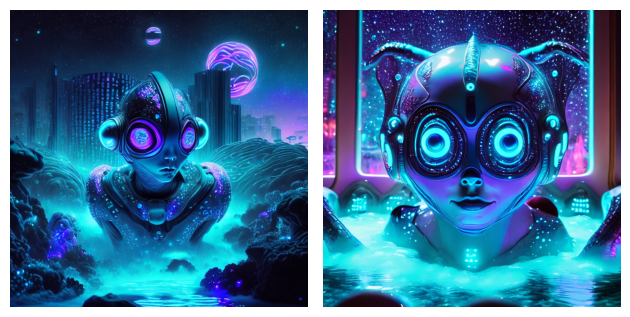

In [14]:
params={'num_inference_steps':100,'num_images_per_prompt':2,'negative_prompt':'ugly,distorted,low quality'}
generate_image(pipe,prompt3,params)